In [ ]:
import pandas as pd
import matplotlib.pylab as plot
import numpy as np
import seaborn as sns
%matplotlib inline
edf=pd.read_csv("F:\\Data Science Project\Suicides in India 2001-2012.csv")
edf

In [2]:
edf.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [3]:
edf.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


In [4]:
edf.shape

(237519, 7)

In [5]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [19]:
edf.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
edf.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [21]:
edf.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

In [20]:
c1=edf.select_dtypes(include=["int64","Float64"]).keys()
print(c1)

Index(['Year', 'Total'], dtype='object')


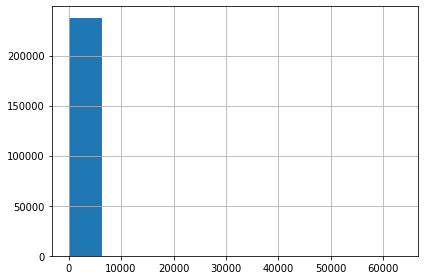

In [22]:
edf['Total'].hist()
plot.tight_layout()

In [32]:
print(len(edf[['Total']][(edf.Total==0)]))
print(len(edf[['State']][(edf.State=="Total (All India)")]))
print(len(edf[['State']][(edf.State=="Total (States)")]))
print(len(edf[['State']][(edf.State=="Total (Uts)")]))

135481
312
312
312


In [2]:
edf.drop((edf[edf['Total'] == 0].index | edf[edf['State']=="Total (All India)"].index | edf[edf['State']=="Total (States)"].index | edf[edf['State']=="Total (Uts)"].index| edf[edf['Age_group']=="0-100+"].index), inplace = True)
edf.replace('Bankruptcy or Sudden change in Economic', 
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
edf.replace('By Other means (please specify)', 'By Other means', inplace=True)
edf.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency', inplace=True)
edf

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means,Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


In [3]:
edf.nunique()

State          35
Year           12
Type_code       3
Type           53
Gender          2
Age_group       5
Total        1104
dtype: int64

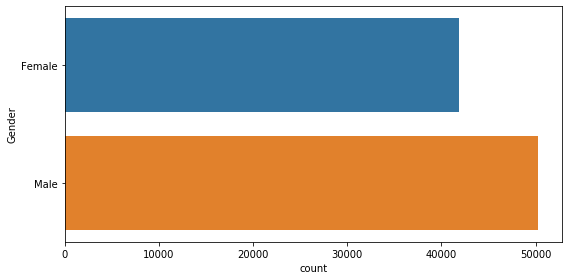

In [4]:
plot.figure(figsize=(8,4))
sns.countplot(y=edf.Gender)
plot.tight_layout()

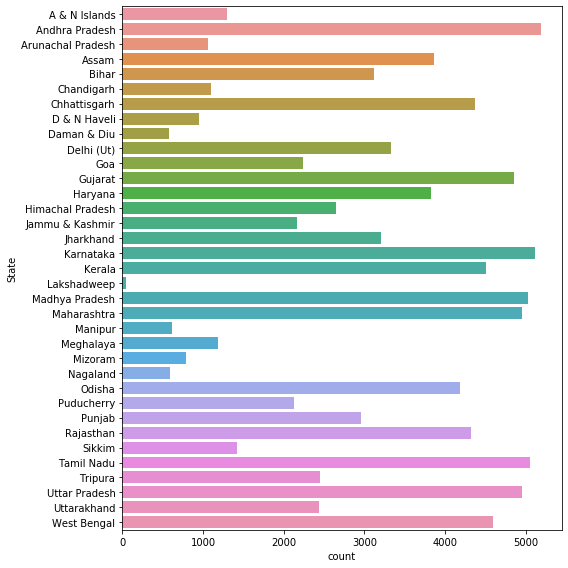

In [3]:
plot.figure(figsize=(8,8))
sns.countplot(y=edf.State)
plot.tight_layout()

                State   Total
0         Maharashtra  541167
1         West Bengal  497962
2          Tamil Nadu  491065
3      Andhra Pradesh  488419
4           Karnataka  440895
5              Kerala  323074
6      Madhya Pradesh  270921
7             Gujarat  198504
8        Chhattisgarh  181364
9              Odisha  160338
10          Rajasthan  153080
11      Uttar Pradesh  139992
12              Assam  103338
13            Haryana   88302
14         Delhi (Ut)   50558
15          Jharkhand   29820
16             Punjab   27810
17              Bihar   27724
18            Tripura   27577
19         Puducherry   19286
20   Himachal Pradesh   15924
21        Uttarakhand   11092
22                Goa   10413
23    Jammu & Kashmir    8885
24             Sikkim    5758
25      A & N Islands    4863
26  Arunachal Pradesh    3977
27          Meghalaya    3243
28         Chandigarh    3096
29            Mizoram    2486
30       D & N Haveli    2058
31            Manipur    1260
32        

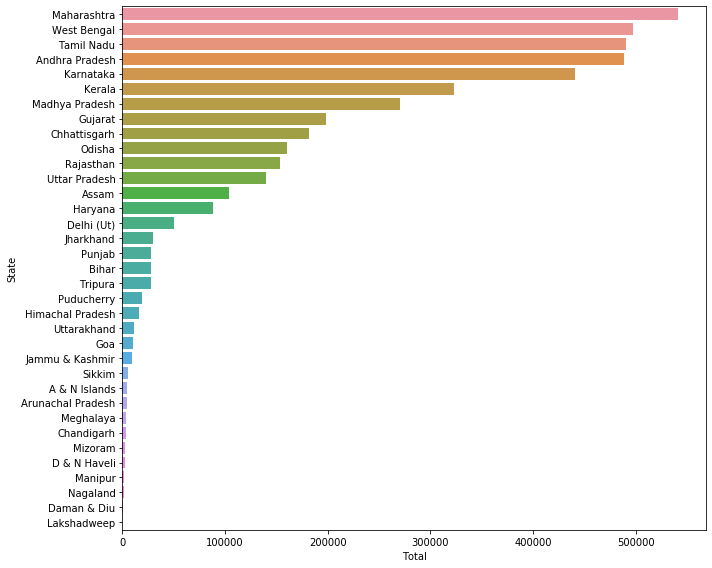

In [5]:
plot.figure(figsize=(10,8))
df_state=edf.groupby('State').agg({"Total":"sum"}).sort_values(by='Total',ascending=False)
df_state.reset_index(inplace=True)
sns.barplot(y="State",x="Total",data=df_state)
plot.tight_layout()
print(df_state)

In [7]:
q1=edf.select_dtypes(include=["int64","Float64"]).keys()
print(q1)

Index(['Year', 'Total'], dtype='object')


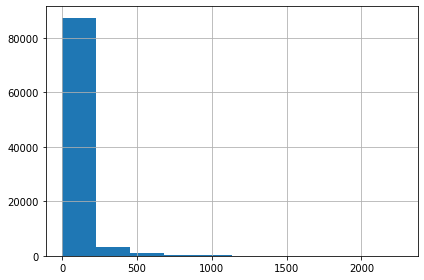

In [8]:
edf['Total'].hist()
plot.tight_layout()

In [9]:
edf[q1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92159 entries, 13 to 237397
Data columns (total 2 columns):
Year     92159 non-null int64
Total    92159 non-null int64
dtypes: int64(2)
memory usage: 4.6 MB


In [10]:
edf[q1].describe()

,Year,Total
count,92159.000000,92159.000000
mean,2006.547087,47.050728
std,3.457071,119.900351
min,2001.000000,1.000000
25%,2004.000000,2.000000
50%,2007.000000,7.000000
75%,2010.000000,31.000000
max,2012.000000,2263.000000


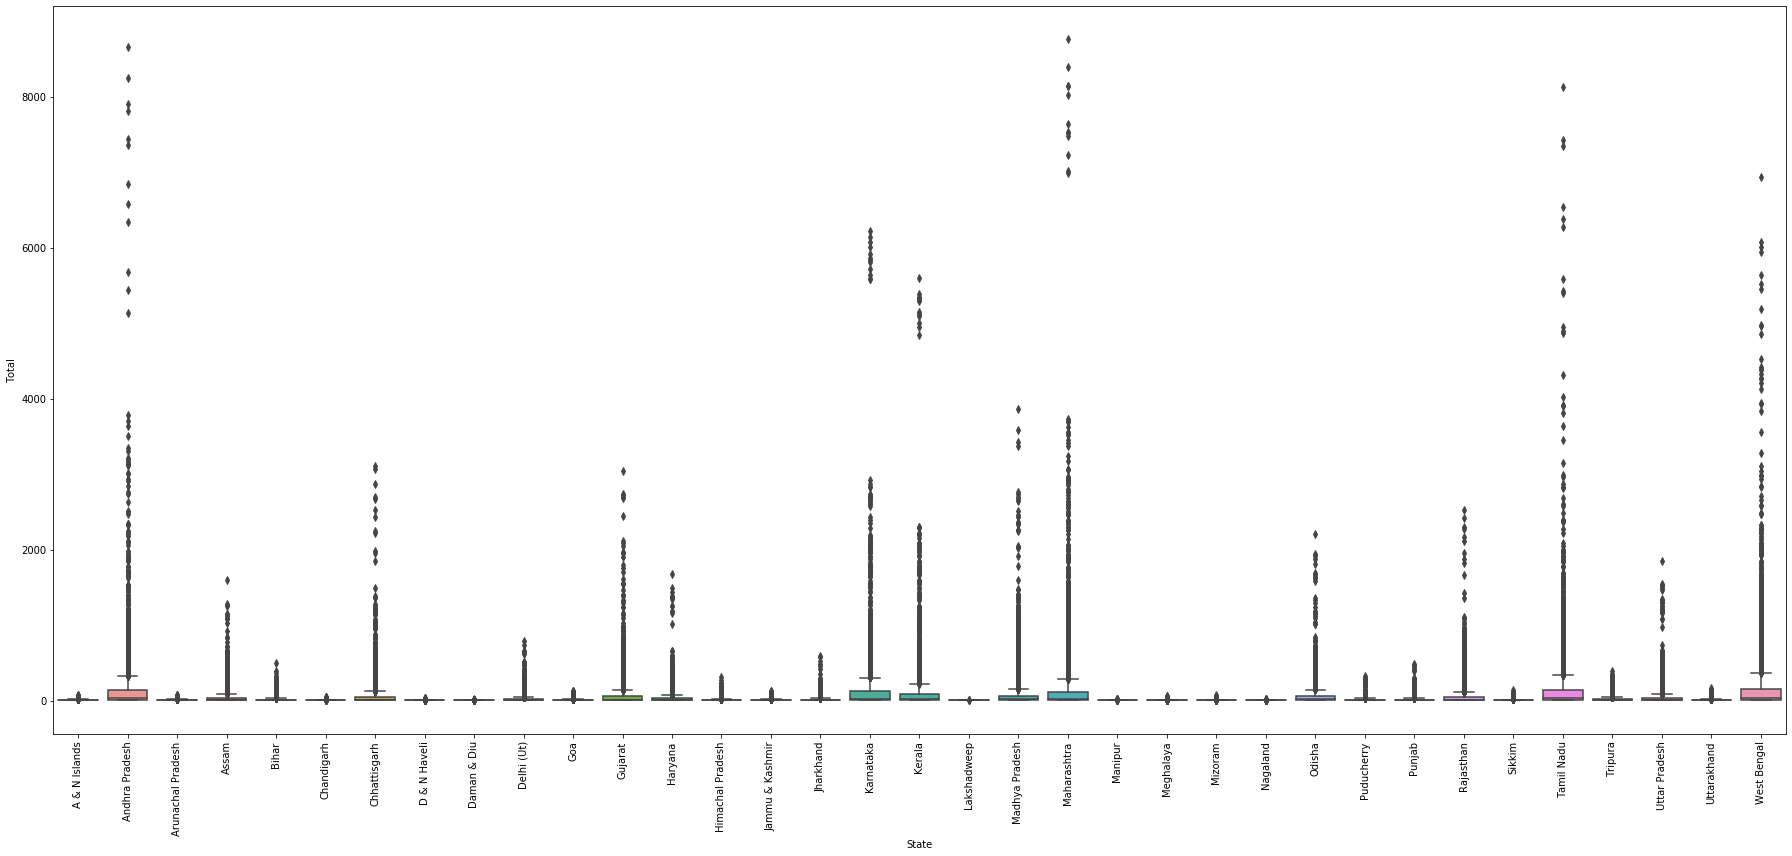

In [47]:
plot.figure(figsize=(25,12))
x=sns.boxplot(x=edf.State,y=edf.Total)
x.set_xticklabels(x.get_xticklabels(),rotation=90)
plot.tight_layout()

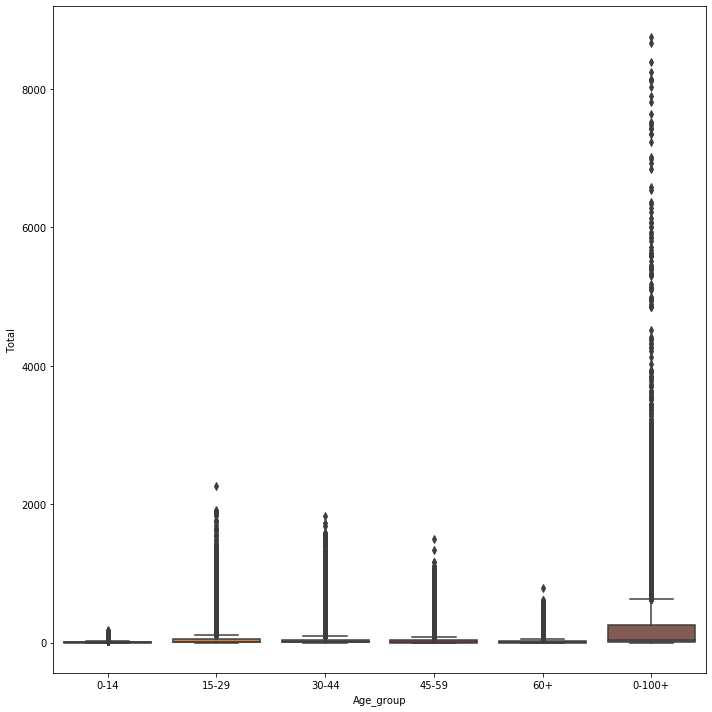

In [122]:
plot.figure(figsize=(10,10))
sns.boxplot(x=edf.Age_group,y=edf.Total)
plot.tight_layout()

              Type_code    Total
0  Professional_Profile  1439243
1                Causes  1440974
2      Education_Status  1455931
3         Means_adopted  1455931
4         Social_Status  1455931


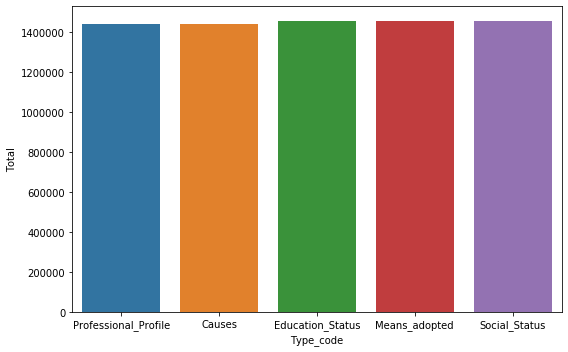

In [108]:
df_state=edf.groupby('Type_code').agg({"Total":"sum"}).sort_values(by='Total')
df_state.reset_index(inplace=True)
print(df_state)
plot.figure(figsize=(8,5))
sns.barplot(x="Type_code",y="Total",data=df_state)
plot.tight_layout()

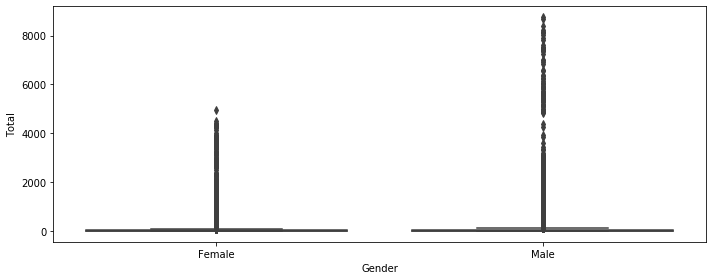

In [124]:
plot.figure(figsize=(10,4))
sns.boxplot(x=edf.Gender,y=edf.Total)
plot.tight_layout()

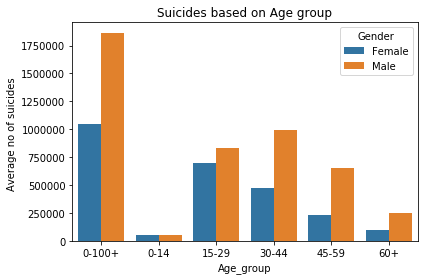

In [125]:
k=edf.groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum()
sns.barplot(x="Age_group", y="Total",hue='Gender',data=k).set_title('Suicides based on Age group')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

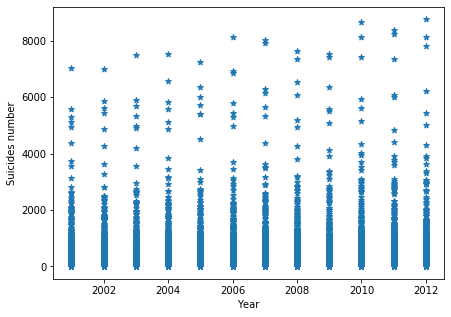

In [38]:
x=edf.Year
y=edf.Total
plot.figure(figsize=[7,5])
plot.scatter(x=x,y=y,marker='*')
plot.xlabel("Year")
plot.ylabel("Suicides number")
plot.show()

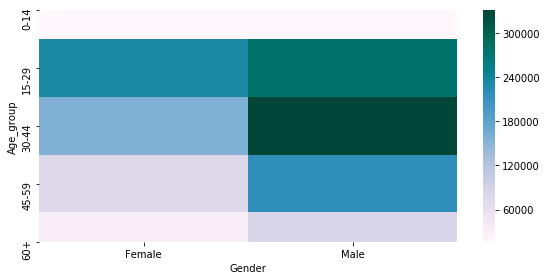

In [39]:
causes = edf[edf['Type_code']=='Causes']
causesgrp = causes.groupby(['Gender','Age_group'],as_index=False).sum()
causesgrpvt = causesgrp.pivot(index='Age_group',columns='Gender',values='Total')
plot.figure(figsize=(8,4))
sns.heatmap(causesgrpvt,cmap='PuBuGn')
plot.tight_layout()

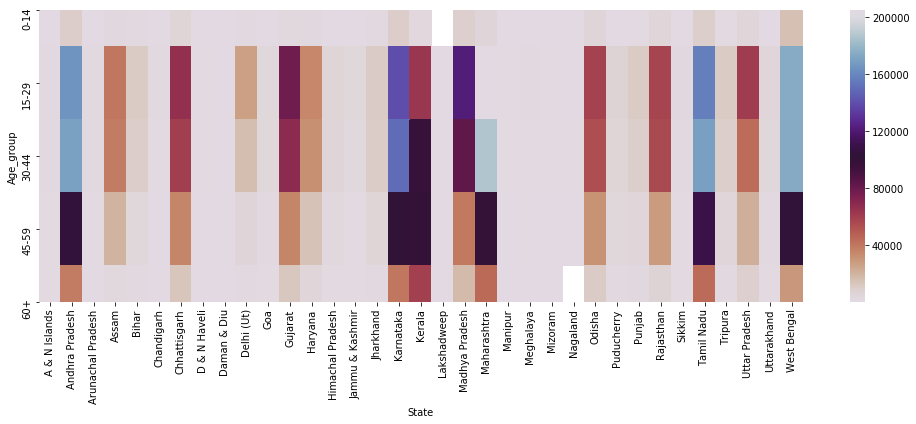

In [14]:
progrp = edf.groupby(['State','Age_group'],as_index=False).sum()
progrpvt = progrp.pivot(index='Age_group',columns='State',values='Total')
plot.figure(figsize=(14,6))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

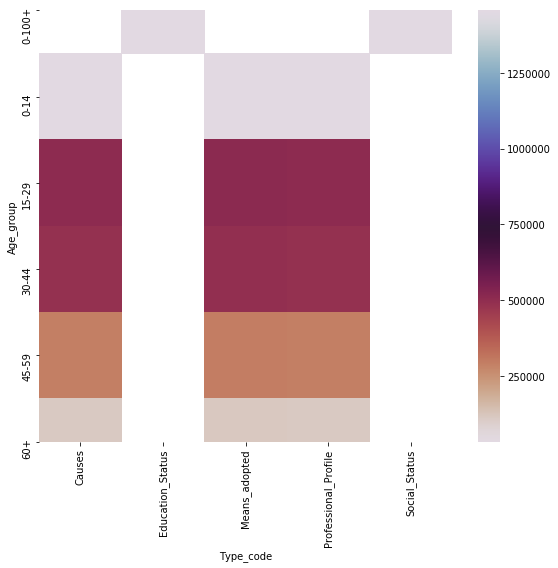

In [14]:
progrp = edf.groupby(['Type_code','Age_group'],as_index=False).sum()
progrpvt = progrp.pivot(index='Age_group',columns='Type_code',values='Total')
plot.figure(figsize=(8,8))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

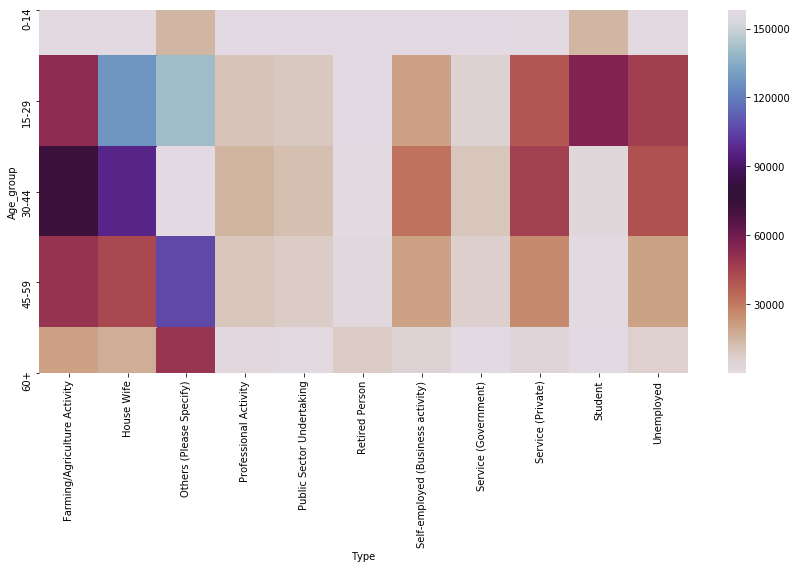

In [11]:
pro = edf[edf['Type_code']=='Professional_Profile']
progrp = pro.groupby(['Type','Age_group'],as_index=False).sum()
progrpvt = progrp.pivot(index='Age_group',columns='Type',values='Total')
plot.figure(figsize=(12,8))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

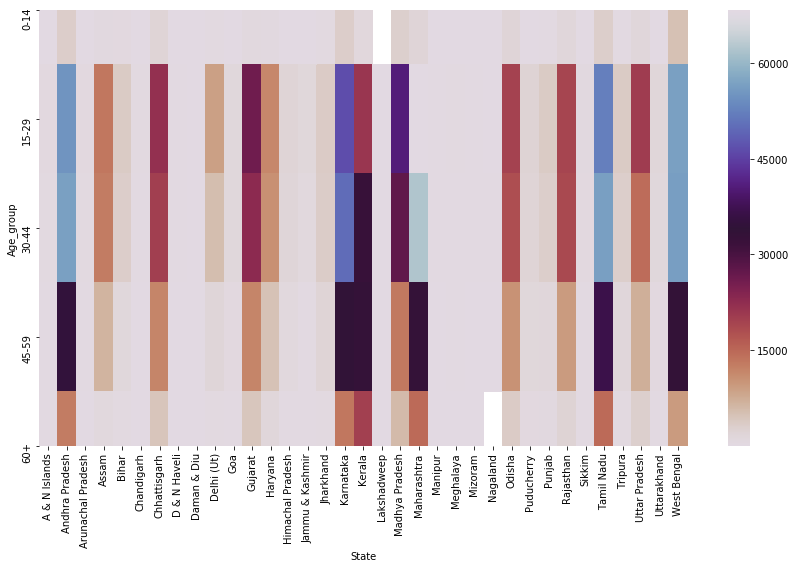

In [20]:
pro = edf[edf['Type_code']=='Causes']
progrp = pro.groupby(['State','Age_group'],as_index=False).sum()
progrpvt = progrp.pivot(index='Age_group',columns='State',values='Total')
plot.figure(figsize=(12,8))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

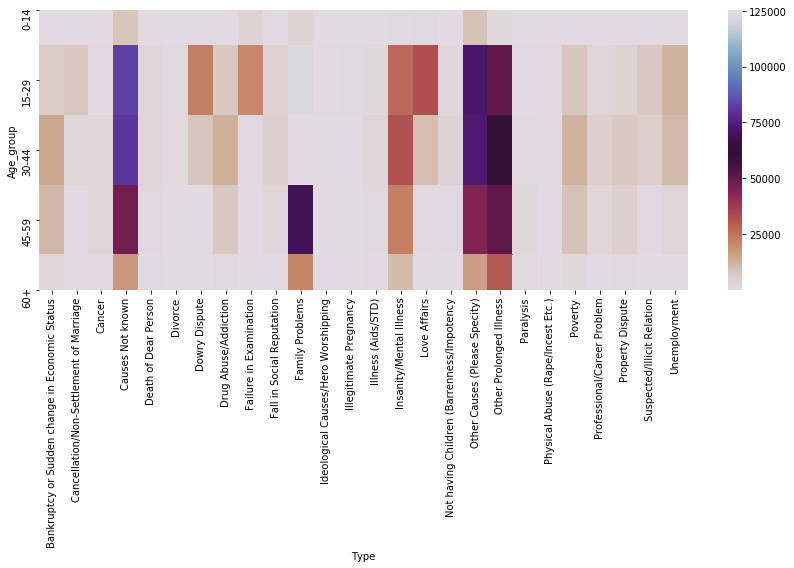

In [6]:
pro = edf[edf['Type_code']=='Causes']
progrp = pro.groupby(['Type','Age_group'],as_index=False).sum()
progrpvt = progrp.pivot(index='Age_group',columns='Type',values='Total')
plot.figure(figsize=(12,8))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

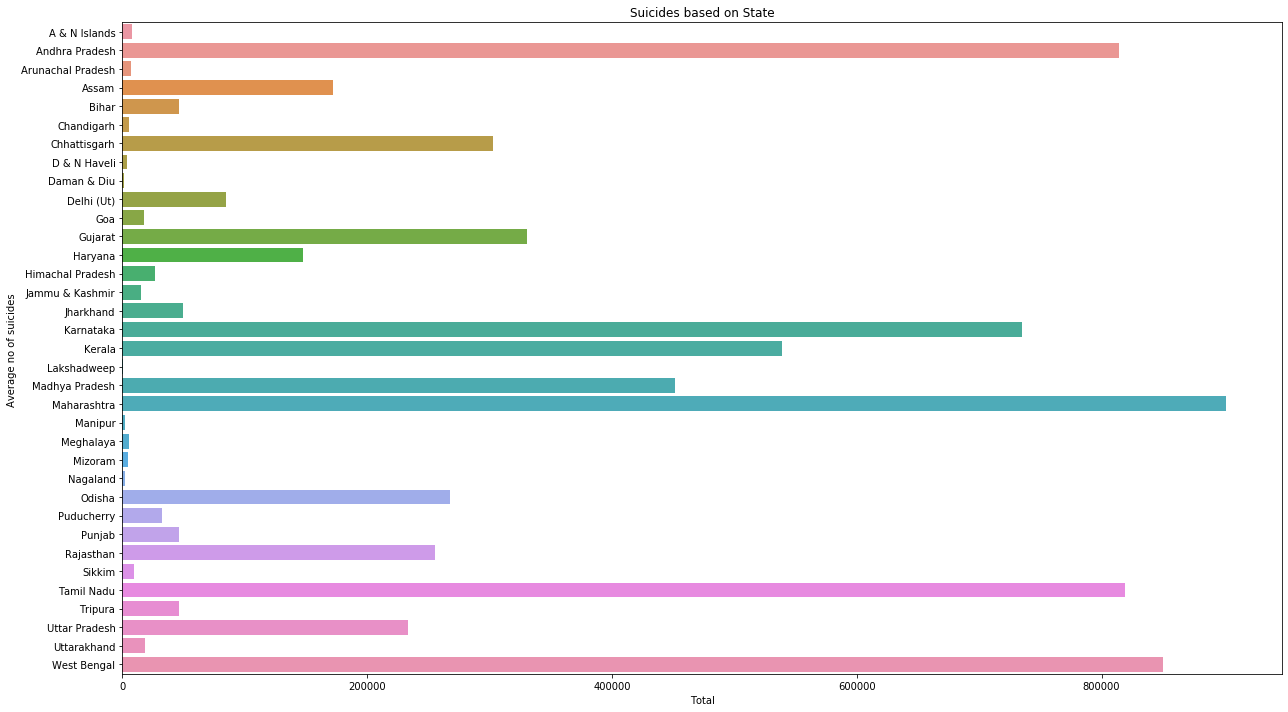

In [31]:
k=edf.groupby(by=['State'],as_index=False)['Total'].sum()
k.sort_values(by="Total")
plot.figure(figsize=(18,10))
sns.barplot(x="Total", y="State",data=k).set_title('Suicides based on State')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

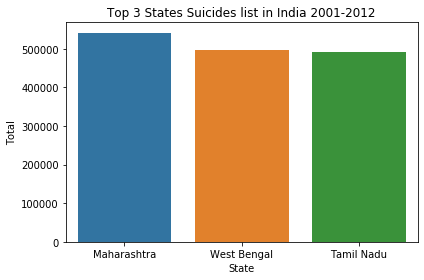

In [15]:
df_state=edf.groupby('State').agg({"Total":"sum"}).sort_values(by='Total',ascending=False)[:3]
df_state.reset_index(inplace=True)
plot.title("Top 3 States Suicides list in India 2001-2012")
sns.barplot(x="State",y="Total",data=df_state)
plot.tight_layout()

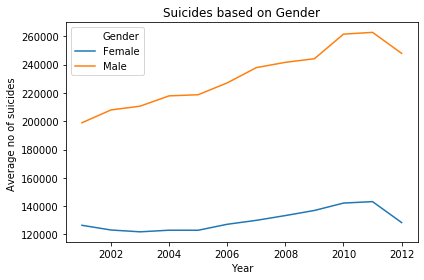

In [16]:
k=edf.groupby(by=['Gender','Year'],as_index=False)['Total'].sum()
sns.lineplot(x="Year", y="Total",hue='Gender',data=k).set_title('Suicides based on Gender')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

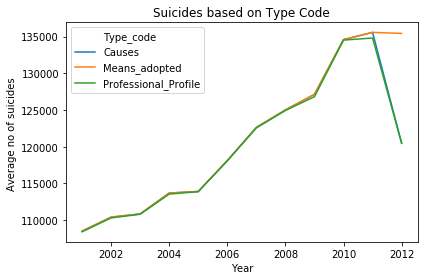

In [17]:
k=edf.groupby(by=['Type_code','Year'],as_index=False)['Total'].sum()
sns.lineplot(x="Year", y="Total",hue='Type_code',data=k).set_title('Suicides based on Type Code')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

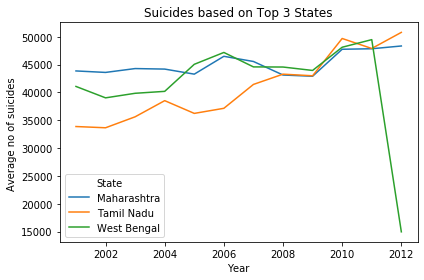

In [18]:
df_state=edf.groupby('State').agg({"Total":"sum"}).sort_values(by='Total',ascending=False)[:3]
df_state.reset_index(inplace=True)
data2=edf[["State","Year","Total"]][(edf.State==df_state.State[0])|(edf.State==df_state.State[1])|(edf.State==df_state.State[2])]
k=data2.groupby(by=['State','Year'],as_index=False)['Total'].sum()
sns.lineplot(x="Year", y="Total",hue='State',data=k).set_title('Suicides based on Top 3 States')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

In [140]:
c1=edf.select_dtypes(include=["object"]).keys()
print(c1)

Index(['State', 'Type_code', 'Type', 'Gender', 'Age_group'], dtype='object')


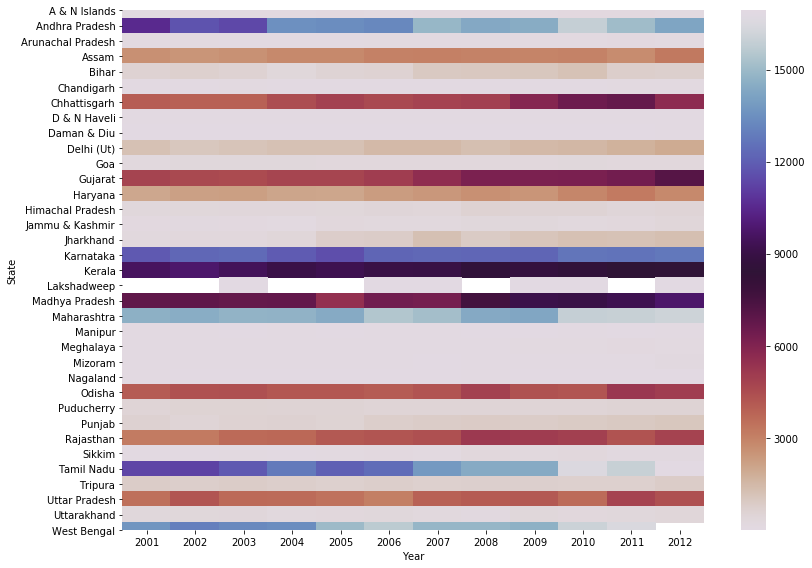

In [5]:
pro = edf[edf['Type_code']=='Causes']
progrp = pro.groupby(['State','Year'],as_index=False).sum()
progrpvt = progrp.pivot(index='State',columns='Year',values='Total')
plot.figure(figsize=(12,8))
sns.heatmap(progrpvt,cmap='twilight_r')
plot.tight_layout()

In [19]:
edf.corr()

,Year,Total
Year,1.000000,0.021447
Total,0.021447,1.000000


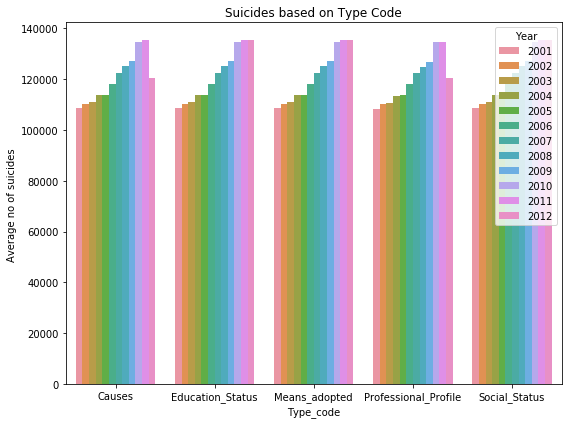

In [50]:
k=edf.groupby(by=['Type_code','Year'],as_index=False)['Total'].sum()
plot.figure(figsize=(8,6))
sns.barplot(x="Type_code", y="Total",hue='Year',data=k).set_title('Suicides based on Type Code')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

<Figure size 864x864 with 0 Axes>

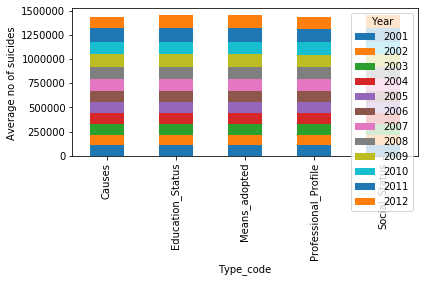

In [78]:
k=edf.groupby(by=['Type_code','Year'],as_index=True)['Total'].sum().unstack()
plot.figure(figsize=(12,12))
k.plot(kind='bar',stacked=True)
plot.ylabel('Average no of suicides ')
plot.tight_layout()

<Figure size 864x864 with 0 Axes>

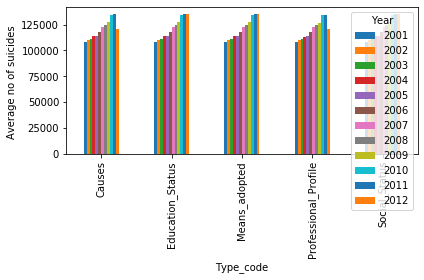

In [61]:
plot.figure(figsize=(12,12))
edf.groupby(by=['Type_code','Year'],as_index=True)['Total'].sum().unstack().plot(kind='bar')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

In [20]:
print(edf.groupby(['Year','Gender'],as_index=True)['Total'].sum())

Year  Gender
2001  Female    126493
      Male      198935
2002  Female    123165
      Male      207981
2003  Female    121877
      Male      210639
2004  Female    123021
      Male      217934
2005  Female    122992
      Male      218725
2006  Female    127217
      Male      227102
2007  Female    129980
      Male      237865
2008  Female    133364
      Male      241616
2009  Female    136970
      Male      244157
2010  Female    142191
      Male      261537
2011  Female    143212
      Male      262777
2012  Female    128414
      Male      247984
Name: Total, dtype: int64


In [21]:
print(edf.groupby(['Age_group','Gender'],as_index=True)['Total'].sum())

Age_group  Gender
0-14       Female     49436
           Male       48974
15-29      Female    701215
           Male      832822
30-44      Female    477461
           Male      994138
45-59      Female    232542
           Male      652635
60+        Female     98242
           Male      248683
Name: Total, dtype: int64


In [27]:
data2=edf[["Total"]][(edf.Year==2012)&(edf.State=="West Bengal")]
print(data2.sum())

Total    44871
dtype: int64


    Year   Total
0   2001  542440
1   2002  551980
2   2003  554218
3   2004  568349
4   2005  569545
5   2006  590543
6   2007  613119
7   2008  625014
8   2009  635429
9   2010  672926
10  2011  677159
11  2012  647288


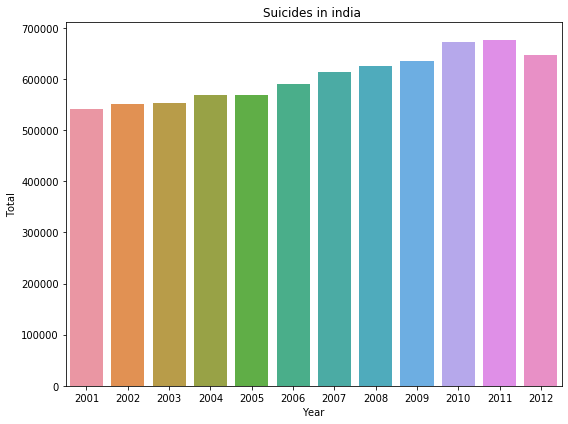

In [3]:
df_year_total = edf.groupby("Year").agg({"Total":"sum"})
df_year_total.reset_index(inplace=True)
print(df_year_total)
plot.figure(figsize=(8,6))
plot.title("Suicides in india ")
sns.barplot(x="Year" , y="Total" , data=df_year_total)
plot.tight_layout()

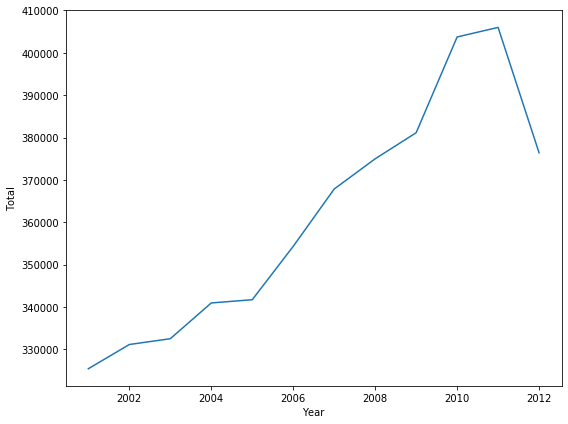

In [22]:
k = edf.groupby("Year").agg({"Total":"sum"})
k.reset_index(inplace=True)
plot.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Total",data=k)
plot.tight_layout()

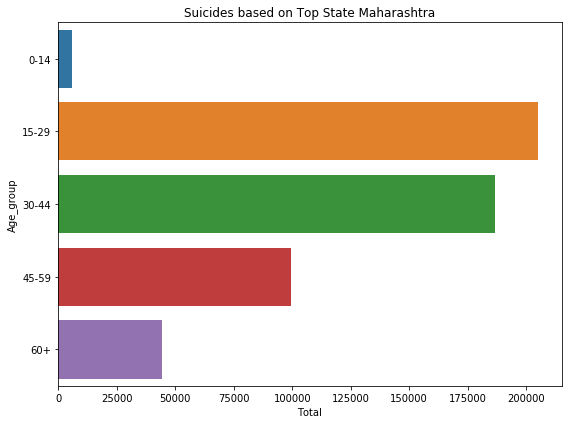

In [3]:
df_state=edf.groupby('State').agg({"Total":"sum"}).sort_values(by='Total',ascending=False)[:1]
df_state.reset_index(inplace=True)
data2=edf[["State","Age_group","Total"]][(edf.State==df_state.State[0])&(edf.Age_group!='0-100+')]
k=data2.groupby(by=['State','Age_group'],as_index=False)['Total'].sum()
plot.figure(figsize=(8,6))
sns.barplot(y="Age_group", x="Total",data=k).set_title('Suicides based on Top State Maharashtra')
plot.tight_layout()

In [8]:
edf.corr()

,Year,Total
Year,1.000000,0.005231
Total,0.005231,1.000000


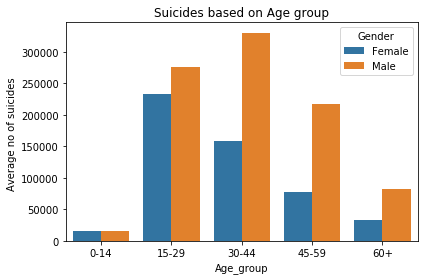

In [18]:
df_Age=edf[["Gender","Age_group","Total"]][(edf.Age_group!='0-100+')&(edf.Type_code=='Causes')]
k=df_Age.groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum()
sns.barplot(x="Age_group", y="Total",hue='Gender',data=k).set_title('Suicides based on Age group')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

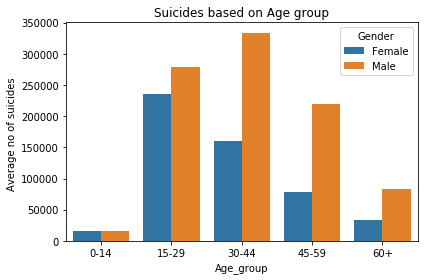

In [19]:
df_Age=edf[["Gender","Age_group","Total"]][(edf.Age_group!='0-100+')&(edf.Type_code=='Means_adopted')]
k=df_Age.groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum()
sns.barplot(x="Age_group", y="Total",hue='Gender',data=k).set_title('Suicides based on Age group')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

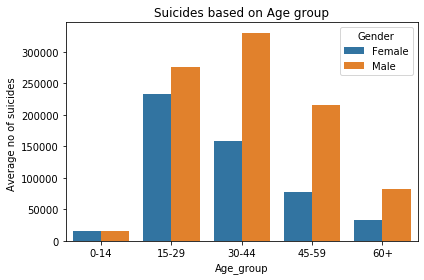

In [20]:
df_Age=edf[["Gender","Age_group","Total"]][(edf.Age_group!='0-100+')&(edf.Type_code=='Professional_Profile')]
k=df_Age.groupby(by=['Gender','Age_group'],as_index=False)['Total'].sum()
sns.barplot(x="Age_group", y="Total",hue='Gender',data=k).set_title('Suicides based on Age group')
plot.ylabel('Average no of suicides ')
plot.tight_layout()

In [4]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
#edf['Gender']=number.fit_transform(edf['Gender'].astype('str'))
edf['Age_group']=number.fit_transform(edf['Age_group'].astype('str'))
#edf['State']=number.fit_transform(edf['State'].astype('str'))
#edf['Type_code']=number.fit_transform(edf['Type_code'].astype('str'))
edf

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,1,8
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,4,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,4,53
237395,West Bengal,2012,Means_adopted,By Other means,Male,4,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,4,99


Estimated coefficients:
b_0 = 121.95299500831948 \ 
b_1 = 116.406441170224


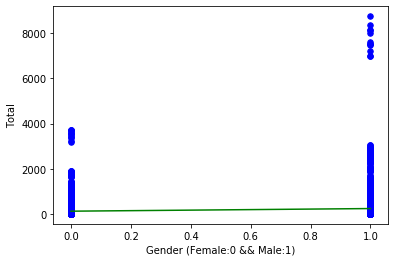

In [49]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 

    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 

    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 

    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 

    return(b_0, b_1) 

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plot.scatter(x, y, color = "blue", marker = "o", s = 30) 

    # predicted response vector 
    y_pred = b[0] + b[1]*x 

    # plotting the regression line 
    plot.plot(x, y_pred, color = "green") 

    # putting labels 
    plot.xlabel('Gender (Female:0 && Male:1)') 
    plot.ylabel('Total') 

    # function to show plot 
    plot.show() 

def main(): 
    # observations 
    x = edf['Gender'][(edf.State=="Maharashtra")]
    y = edf['Total'][(edf.State=="Maharashtra")]
    
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 

    # plotting regression line 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 


[121.56375839]
[[107.3874491]]


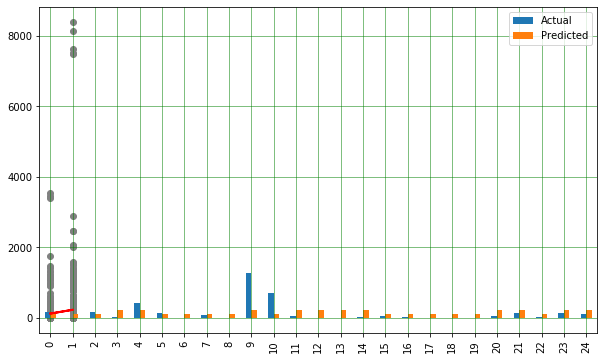

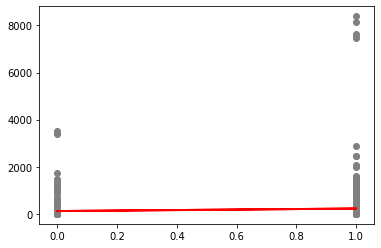

Mean Absolute Error: 253.0335619652461
Mean Squared Error: 435958.27430847613
Root Mean Squared Error: 660.2713641439224
R^2 Value: 
 0.010400253805289417


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = edf[['Gender']][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = LinearRegression()  
regressor.fit(X_train,y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1=df.head(25)
df1.plot(kind='bar',figsize=(10,6))
plot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plot.scatter(X_test, y_test,  color='gray')
plot.plot(X_test, y_pred, color='red', linewidth=2)
plot.show()
plot.scatter(X_test, y_test,  color='gray')
plot.plot(X_test, y_pred, color='red', linewidth=2)
plot.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Value: \n", metrics.r2_score(y_test, y_pred))

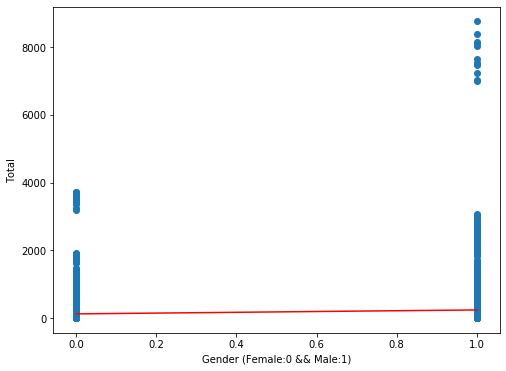

In [50]:
from sklearn.linear_model import LinearRegression
X = edf['Gender'][(edf.State=="Maharashtra")].values.reshape(-1, 1)  # values converts it into a numpy array
Y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plot.figure(figsize=(8,6))
plot.scatter(X, Y)
plot.plot(X, Y_pred, color='red')
plot.xlabel('Gender (Female:0 && Male:1)') 
plot.ylabel('Total') 
plot.show()

In [9]:
edf.replace(0, 'Female', inplace=True)
edf.replace(1, 'Male', inplace=True)
edf

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,Male
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,Male
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,Male
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,Male
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


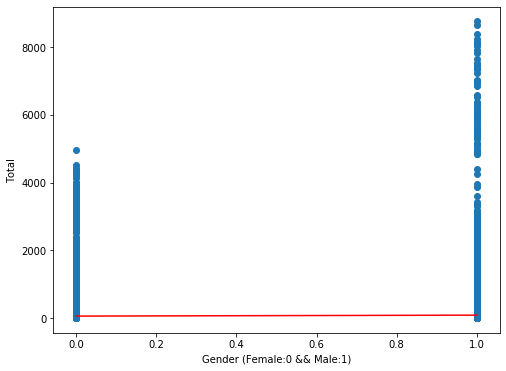

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     275.4
Date:                Tue, 19 May 2020   Prob (F-statistic):           9.05e-62
Time:                        16:26:55   Log-Likelihood:            -7.0953e+05
No. Observations:              101110   AIC:                         1.419e+06
Df Residuals:                  101108   BIC:                         1.419e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.3427      1.255     44.886      0.0

In [51]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = edf['Gender'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = edf['Total'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plot.figure(figsize=(8,6))
plot.scatter(X, Y)
plot.plot(X, Y_pred, color='red')
plot.xlabel('Gender (Female:0 && Male:1)') 
plot.ylabel('Total') 
plot.show()

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

In [35]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = edf[['State','Gender']]
Y = edf['Total']
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)[0:5]
print("Predictions : ",Y_pred)
print("Linear Regressiion score : ",linear_regressor.score(X,Y))

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

predictions = model.predict(X) 
predictions=np.array(predictions)
print(predictions)

print_model = model.summary()
print(print_model)

Predictions :  [39.86455839 39.86455839 68.29448656 68.29448656 39.86455839]
Linear Regressiion score :  0.003961493812817296


C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[39.86455839 39.86455839 68.29448656 ... 99.81493868 99.81493868
 99.81493868]
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.12e-88
Time:                        16:06:56   Log-Likelihood:            -7.0946e+05
No. Observations:              101110   AIC:                         1.419e+06
Df Residuals:                  101107   BIC:                         1.419e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

Prediction : [39.86455839 71.38501051 68.29448656 99.81493868]


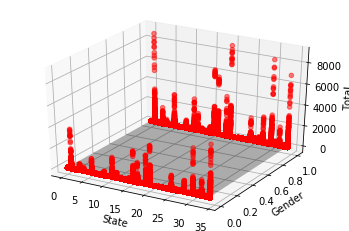

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.12e-88
Time:                        16:20:07   Log-Likelihood:            -7.0946e+05
No. Observations:              101110   AIC:                         1.419e+06
Df Residuals:                  101107   BIC:                         1.419e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8646      1.929     20.662      0.0

In [42]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.sandbox.regression.predstd import wls_prediction_std

df2=pd.DataFrame(X,columns=['State','Gender'])
df2['Total']=pd.Series(Y)
df2

model = sm.ols(formula="Total ~ State + Gender",data=df2).fit()
model.params

x_pre,y_pre=np.meshgrid(np.linspace(df2.State.min(),df2.State.max(),2),np.linspace(df2.Gender.min(),df2.Gender.max(),2))
only_x=pd.DataFrame({"State":x_pre.ravel(),"Gender":y_pre.ravel()})
fittedy=model.predict(only_x)
fittedy=np.array(fittedy)
print("Prediction :",fittedy)
fig=plot.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(df2['State'],df2['Gender'],df2['Total'],c="red",marker="o",alpha=0.5)
ax.plot_surface(x_pre,y_pre,fittedy.reshape(x_pre.shape),color="None",alpha=0.3)
ax.set_xlabel('State')
ax.set_ylabel('Gender')
ax.set_zlabel('Total')
plot.show()

print_model = model.summary()
print(print_model)

In [55]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = edf[['State','Gender',"Type_code"]]
Y = edf['Total']
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)[0:5]
print("Predictions : ",Y_pred)
print("Linear Regressiion score : ",linear_regressor.score(X,Y))

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

predictions = model.predict(X) 
predictions=np.array(predictions)
print(predictions)

print_model = model.summary()
print(print_model)

Predictions :  [40.81767559 40.81767559 68.1426532  68.1426532  40.81767559]
Linear Regressiion score :  0.016014647667264792
[ 40.81767559  40.81767559  68.1426532  ... 139.73635763 139.73635763
 139.73635763]


C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     548.5
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        16:39:46   Log-Likelihood:            -7.0885e+05
No. Observations:              101110   AIC:                         1.418e+06
Df Residuals:                  101106   BIC:                         1.418e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8177      2.185     18.681      0.0

[54.71023719]
[[-5.258647]]
   Actual  Predicted
0     112  44.192943
1       6  38.934296
2       1  33.675649
3       9  49.451590
4       2  49.451590


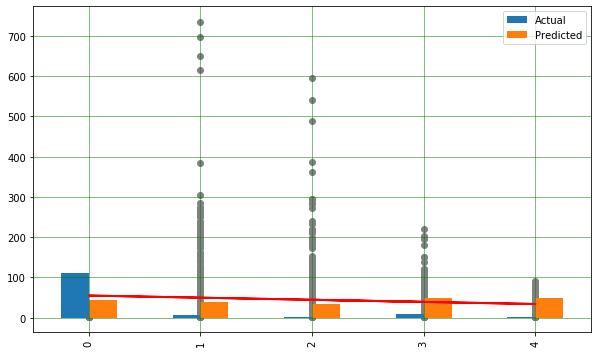

R^2 Value:  0.0139137509318783


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = edf[['Age_group']][(edf.State=="Gujarat")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Gujarat")].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = LinearRegression()  
regressor.fit(X_train,y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1=df.head(5)
print(df1)
df1.plot(kind='bar',figsize=(10,6))
plot.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plot.scatter(X_test, y_test,  color='gray')
plot.plot(X_test, y_pred, color='red', linewidth=2)
plot.show()
print("R^2 Value: ", metrics.r2_score(y_test, y_pred))

In [41]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = edf[['State','Age_group']]
Y = edf['Total']
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)[0:5]
print("Predictions : ",Y_pred)
print("Linear Regressiion score : ",linear_regressor.score(X,Y))

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

predictions = model.predict(X) 
predictions=np.array(predictions)
print(predictions)

print_model = model.summary()
print(print_model)

Predictions :  [41.39046499 41.39046499 41.39046499 41.39046499 39.19407494]
Linear Regressiion score :  0.002877907049188222
[41.39046499 41.39046499 41.39046499 ... 52.02779578 52.02779578
 52.02779578]
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.12e-58
Time:                        11:11:12   Log-Likelihood:            -5.7177e+05
No. Observations:               92159   AIC:                         1.144e+06
Df Residuals:                   92156   BIC:                         1.144e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
     

C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics

X = edf['Year'][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Gender'][(edf.State=="Maharashtra")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = svm.SVC(kernel="linear") 
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5333333333333333
Precision: 0.5333333333333333
Recall: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       434
           1       0.53      1.00      0.70       496

    accuracy                           0.53       930
   macro avg       0.27      0.50      0.35       930
weighted avg       0.28      0.53      0.37       930



C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics

X = edf['Year'][(edf.State=="Gujarat")].values.reshape(-1,1)
y = edf['Gender'][(edf.State=="Gujarat")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = svm.SVC(kernel="linear") 
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5010989010989011
Precision: 0.5010989010989011
Recall: 0.5010989010989011
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       454
           1       0.50      1.00      0.67       456

    accuracy                           0.50       910
   macro avg       0.25      0.50      0.33       910
weighted avg       0.25      0.50      0.33       910



C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics

X = edf['Year'].values.reshape(-1,1)
y = edf['Gender'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = svm.SVC(kernel="linear") 
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5409071180555556
Precision: 0.5409071180555556
Recall: 0.5409071180555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8462
           1       0.54      1.00      0.70      9970

    accuracy                           0.54     18432
   macro avg       0.27      0.50      0.35     18432
weighted avg       0.29      0.54      0.38     18432



C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics

X = edf['Year'].values.reshape(-1,1)
y = edf['Total'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = svm.SVC(kernel="linear") 
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

X = edf['Age_group'][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
#print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
#print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
#print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.1043010752688172


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

X = edf['Age_group'][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = GaussianNB()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
#print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
#print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
#print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.025806451612903226


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn import metrics

X = edf['Age_group'][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = SGDClassifier(loss='modified_huber',shuffle=True)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
#print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
#print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
#print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn import metrics

X = edf['Type_code'][(edf.State=="Maharashtra")].values.reshape(-1,1)
y = edf['Total'][(edf.State=="Maharashtra")].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = SGDClassifier(loss='modified_huber',shuffle=True)
regressor.fit(X_train,y_train)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  
#print('Precision:', metrics.precision_score(y_test, y_pred,average='micro'))  
#print('Recall:', metrics.recall_score(y_test, y_pred,average='micro'))  
#print(metrics.classification_report(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

X = edf['Age_group'].values.reshape(-1,1)
y = edf['Total'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
train_test_split(y, shuffle=False)
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1=df.head(25)
print(df1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


    Actual  Predicted
0       26          1
1      956          1
2        1          1
3        1          1
4        1          1
5      173          1
6       22          1
7       93          1
8        2          1
9        8          1
10       2          1
11       7          1
12       8          1
13      10          1
14       2          1
15       1          1
16       1          1
17    1027          1
18       4          1
19       5          1
20     358          1
21      21          1
22      25          1
23       6          1
24      72          1
Accuracy: 0.16861979166666666


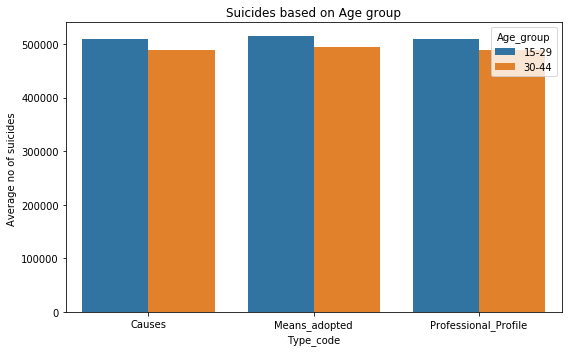

In [3]:
df_Age=edf[["Type_code","Age_group","Total"]][(edf.Age_group=='15-29')|(edf.Age_group=='30-44')]
k=df_Age.groupby(by=['Type_code','Age_group'],as_index=False)['Total'].sum()
plot.figure(figsize=(8,5))
sns.barplot(x="Type_code", y="Total",hue='Age_group',data=k).set_title('Suicides based on Age group')
plot.ylabel('Average no of suicides ')
plot.tight_layout()